<a href="https://colab.research.google.com/github/Twixx10/MachineLearningTASK/blob/main/Week7/Tugas_XGBOOST2_M_Rakan_Bagus_1103213162ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TUGAS XGBOOST2

1. Mengakses Google Drive dan Membaca Dataset

In [6]:
# Mengimpor modul yang diperlukan
import pandas as pd  # Untuk manipulasi data
from google.colab import drive  # Modul untuk mengakses Google Drive

# Mount Google Drive untuk mengakses file di dalamnya
drive.mount('/content/drive')  # Menghubungkan Google Drive ke Colab



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Menentukan path ke file CSV
file_path = '/content/drive/MyDrive/Machine Learning/Dataset/tugasxgboost2.csv'  # Ganti dengan path file Anda

# Membaca file CSV ke dalam DataFrame
data = pd.read_csv(file_path, sep=';')  # Menggunakan separator ';' sesuai format dataset

# Menampilkan beberapa baris pertama dari DataFrame untuk memastikan data sudah ter-load dengan benar
data.head()  # Menampilkan 5 baris pertama dari dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


2. Memilih Fitur dan Target

In [11]:
# Memilih fitur dan target
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol']  # Daftar fitur yang akan digunakan
target = ['quality']  # Target yang ingin diprediksi

# Membuat subset untuk fitur dan target
X = data[predictors]  # Mengambil kolom fitur dari DataFrame
y = data[target]  # Mengambil kolom target dari DataFrame

Penjelasan:
Memilih Fitur dan Target: Kita menentukan kolom mana yang akan digunakan sebagai fitur (predictors) dan mana yang akan menjadi target (quality).
Membuat Subset: Kita membuat subset dari DataFrame untuk fitur dan target yang akan digunakan dalam model.

3. Membagi Data Menjadi Data Latih dan Data Uji

In [12]:
from sklearn.model_selection import train_test_split  # Mengimpor fungsi untuk membagi dataset

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% untuk latih, 20% untuk uji

# Menampilkan bentuk dari data latih dan data uji
print("Bentuk data latih (X_train):", X_train.shape)  # Menampilkan jumlah baris dan kolom fitur latih
print("Bentuk data uji (X_test):", X_test.shape)  # Menampilkan jumlah baris dan kolom fitur uji

Bentuk data latih (X_train): (3918, 11)
Bentuk data uji (X_test): (980, 11)


Penjelasan:
Membagi Dataset: Kita membagi dataset menjadi data latih dan data uji untuk evaluasi model.
Menampilkan Bentuk: Ini memberikan informasi tentang dimensi dari data latih dan data uji, yang penting untuk memahami ukuran dataset.

4. Membuat dan Melatih Model XGBoost

In [13]:
import xgboost as xgb  # Mengimpor pustaka XGBoost

# Membuat model XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # Menggunakan regresi dengan XGBoost

# Melatih model dengan data latih
model.fit(X_train, y_train)  # Melatih model dengan data latih

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Penjelasan:

-Membuat Model: Kita membuat model XGBoost dengan tujuan regresi.

-Melatih Model: Model dilatih menggunakan data latih yang telah disiapkan.

5. Evaluasi Model


In [14]:
from sklearn.metrics import mean_squared_error, r2_score  # Mengimpor metrik evaluasi

# Memprediksi dengan data uji
y_pred = model.predict(X_test)  # Memprediksi target menggunakan data uji

# Menghitung MSE dan R²
mse = mean_squared_error(y_test, y_pred)  # Menghitung Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Menghitung R²

# Menampilkan hasil evaluasi
print("Mean Squared Error:", mse)  # Menampilkan MSE
print("R² Score:", r2)  # Menampilkan R²

Mean Squared Error: 0.3801500643068694
R² Score: 0.5091500282287598


Penjelasan:

-Memprediksi: Kita menggunakan model untuk memprediksi nilai target pada data uji.

-Menghitung Metrik: Metrik seperti MSE dan R² digunakan untuk mengevaluasi kinerja model.

-Menampilkan Hasil: Hasil evaluasi memberikan gambaran tentang seberapa baik model bekerja.

6. Visualisasi Feature Importance

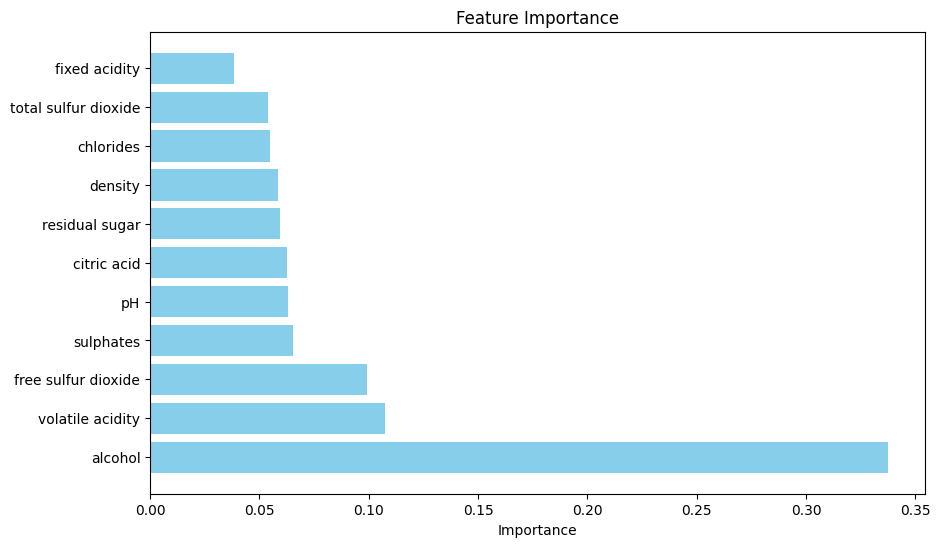

In [15]:
import matplotlib.pyplot as plt  # Mengimpor pustaka untuk visualisasi

# Mengambil feature importance dari model
importance = model.feature_importances_

# Membuat DataFrame untuk visualisasi
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Mengurutkan berdasarkan importance

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()  # Menampilkan plot

Penjelasan:

-Feature Importance: Kita mengambil nilai penting dari setiap fitur yang digunakan dalam model.

-Visualisasi: Menggunakan bar chart untuk menunjukkan fitur mana yang paling berpengaruh terhadap prediksi model.

7. Visualisasi Struktur Pohon

<Figure size 2000x1000 with 0 Axes>

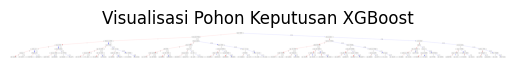

In [22]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Memvisualisasikan pohon keputusan pertama
plt.figure(figsize=(20, 10))
plot_tree(model, num_trees=0)  # Memvisualisasikan pohon pertama tanpa parameter tambahan
plt.title('Visualisasi Pohon Keputusan XGBoost')
plt.show()  # Menampilkan plot

Penjelasan:
Visualisasi Pohon: Kita memvisualisasikan salah satu pohon keputusan dari model XGBoost untuk memahami bagaimana keputusan dibuat.

8. Learning Curve

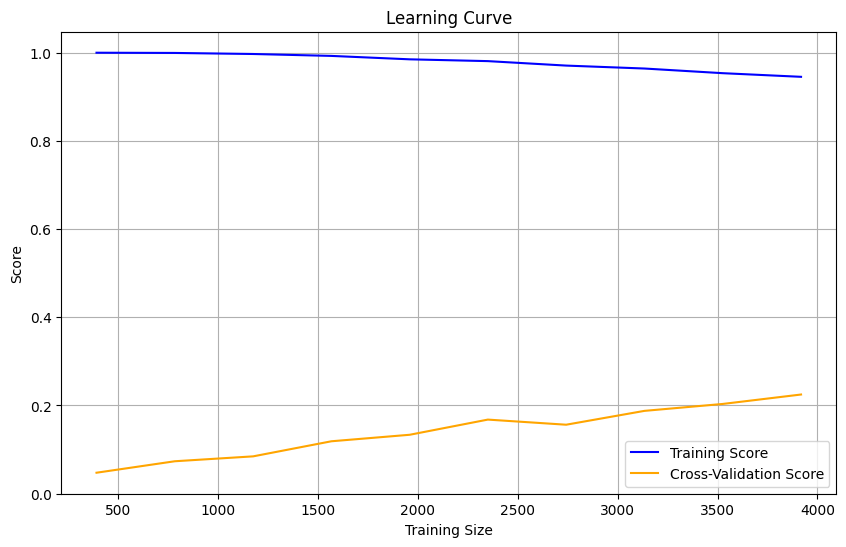

In [23]:
from sklearn.model_selection import learning_curve  # Mengimpor fungsi untuk learning curve
import numpy as np  # Mengimpor NumPy untuk manipulasi array

# Menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Menghitung rata-rata dan deviasi standar
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Visualisasi Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()  # Menampilkan plot

Penjelasan:

-Learning Curve: Kita menghitung learning curve untuk melihat bagaimana model belajar seiring bertambahnya data latih.

-Visualisasi: Plot menunjukkan perbandingan antara skor pelatihan dan skor validasi silang.

9. SHAP Values

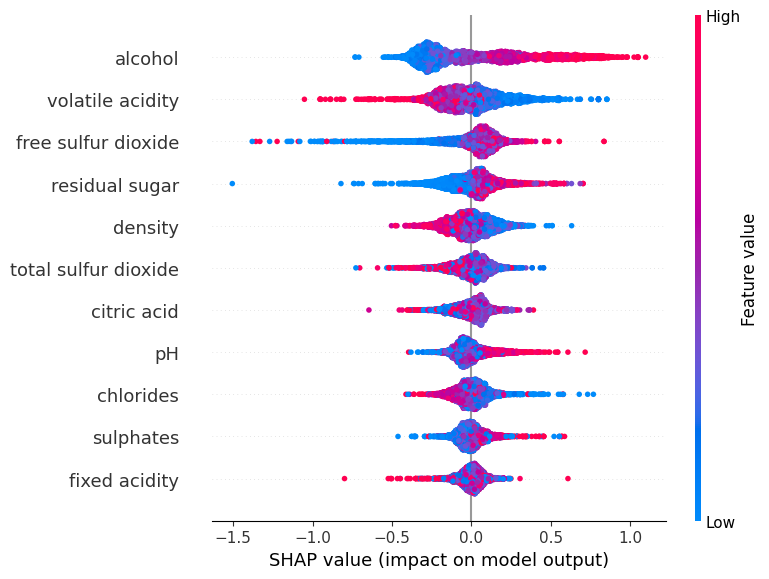

In [24]:
import shap  # Mengimpor pustaka SHAP

# Menghitung SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Visualisasi SHAP values
shap.summary_plot(shap_values, X)  # Menampilkan plot ringkasan SHAP

Penjelasan:
SHAP Values: Kita menggunakan SHAP untuk memahami kontribusi setiap fitur terhadap prediksi model.
Visualisasi: Plot ringkasan SHAP memberikan gambaran tentang fitur mana yang paling berpengaruh dan bagaimana pengaruhnya.

10. Partial Dependence Plot

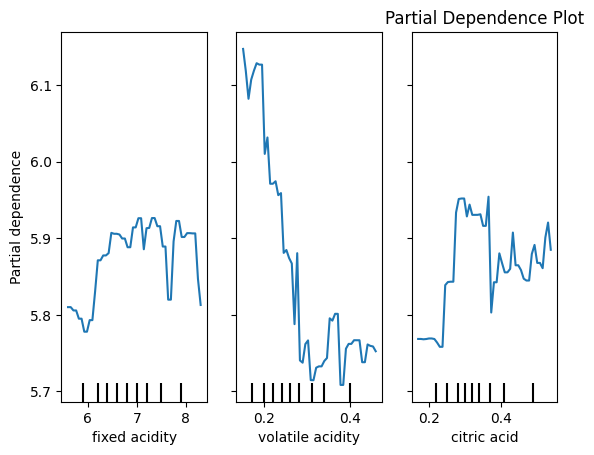

In [26]:
from sklearn.inspection import PartialDependenceDisplay  # Mengimpor PartialDependenceDisplay

# Visualisasi Partial Dependence Plot
features = [0, 1, 2]  # Indeks fitur yang ingin divisualisasikan
display = PartialDependenceDisplay.from_estimator(model, X, features, grid_resolution=50)  # Membuat plot partial dependence
plt.title('Partial Dependence Plot')
plt.show()  # Menampilkan plot

Penjelasan:
Menggunakan PartialDependenceDisplay: Kita menggunakan objek ini untuk membuat plot partial dependence. Ini adalah cara baru yang disarankan untuk memvisualisasikan pengaruh fitur terhadap prediksi model.
from_estimator: Metode ini digunakan untuk menghasilkan plot berdasarkan model yang telah dilatih dan dataset fitur.